# Using Reddit's API for Predicting Comments

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to what subreddit it belongs to?_

Your method for acquiring the data will be scraping threads from at least two subreddits. 

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts which subreddit a given post belongs to.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

In [1]:
import requests
import json
import pandas as pd
import numpy as np

### NASA

In [ ]:
url_nasa = 'https://www.reddit.com/r/nasa.json'

In [ ]:
headers = {'User-agent': 'Nelson 0.1'}

In [ ]:
res = requests.get(url_nasa, headers=headers)

In [ ]:
res.status_code

#### Use `res.json()` to convert the response into a dictionary format and set this to a variable. 

```python
data = res.json()
```

In [ ]:
data_nasa = res.json()

In [ ]:
sorted(data_nasa.keys())

In [ ]:
data_nasa['kind']

In [ ]:
sorted(data_nasa['data'].keys())

#### Getting more results

By default, Reddit will give you the top 25 posts:

```python
print(len(data['data']['children']))
```

If you want more, you'll need to do two things:
1. Get the name of the last post: `data['data']['after']`
2. Use that name to hit the following url: `http://www.reddit.com/r/boardgames.json?after=THE_AFTER_FROM_STEP_1`
3. Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts. 

*NOTE*: Reddit will limit the number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

```python
time.sleep(3) # sleeps 3 seconds before continuing```

This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the `time` library for this to work!

In [ ]:
import time

In [ ]:
data_nasa['data']['after']

In [ ]:
posts_nasa = []
after = None
for i in range(50):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after': after}
    url_nasa = 'https://www.reddit.com/r/nasa.json'
    res = requests.get(url_nasa, params=params, headers = headers)
    if res.status_code == 200:
        nasa_json = res.json()
        current_posts = [p['data'] for p in nasa_json['data']['children']]
        posts_nasa.extend(current_posts)
        after = nasa_json['data']['after']
    else:
        print(res.status_code)
        break
    time.sleep(3)

In [ ]:
len(posts_nasa)

In [ ]:
len(set([p['name'] for p in posts_nasa]))

In [ ]:
posts_nasa

In [ ]:
nasa_df = pd.DataFrame(posts_nasa)

#### NASA saved files

In [ ]:
nasa_df.to_csv('../data/nasa_df.csv')

In [ ]:
with open('../data/nasa_json.json', 'w+') as f:
    json.dump(nasa_json, f)

### SPACE X

In [ ]:
url_spacex = 'https://www.reddit.com/r/spacex.json'

In [ ]:
res_spacex = requests.get(url_spacex, headers=headers)

In [ ]:
res_spacex.status_code

In [ ]:
spacex_json = res_spacex.json()

In [ ]:
posts_spacex = []
after = None
for i in range(50):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after': after}
    url_spacex = 'https://www.reddit.com/r/spacex.json'
    res_spacex = requests.get(url_spacex, params=params, headers = headers)
    if res_spacex.status_code == 200:
        spacex_json = res_spacex.json()
        current_posts = [p['data'] for p in spacex_json['data']['children']]
        posts_spacex.extend(current_posts)
        after = spacex_json['data']['after']
    else:
        print(res_spacex.status_code)
        break
    time.sleep(3)

In [ ]:
len(posts_spacex)

In [ ]:
len(set([p['name'] for p in posts_spacex]))

In [ ]:
spacex_df = pd.DataFrame.from_dict(posts_spacex)

#### SpaceX saved files

In [ ]:
spacex_df.to_csv('../data/spacex_df.csv')

In [ ]:
with open('../data/spacex_json.json', 'w+') as f:
    json.dump(spacex_json, f)

In [ ]:
with open('../data/spacex_json.json', 'r') as f:
    spacex_json = json.load(f)

In [ ]:
#### Go back and drop duplicates. 
##### df.drop_duplicates()
### Also drop 'Unnamed: 0' column

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

### Import Data

In [2]:
spacex_df = pd.read_csv('../data/spacex_df.csv')
nasa_df   = pd.read_csv('../data/nasa_df.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [3]:
df_new = pd.concat([spacex_df, nasa_df], sort=True)

In [4]:
df_new.columns

Index(['Unnamed: 0', 'approved_at_utc', 'approved_by', 'archived', 'author',
       'author_cakeday', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'banned_at_utc', 'banned_by', 'can_gild', 'can_mod_post', 'category',
       'clicked', 'content_categories', 'contest_mode', 'created',
       'created_utc', 'crosspost_parent', 'crosspost_parent_list',
       'distinguished', 'domain', 'downs', 'edited', 'gilded', 'hidden',
       'hide_score', 'id', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_self', 'is_video',
       'likes', 'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_metadata', 

In [5]:
df_new.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df_new.head()

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,NaN,NaN,False,ElongatedMuskrat,NaN,NaN,contributor,[],NaN,r/SpaceX Bot,...,NaN,NaN,Telstar 18V / APStar 5C Launch Campaign Thread,242,https://www.reddit.com/r/spacex/comments/95cte...,[],NaN,False,all_ads,6
1,NaN,NaN,False,ElongatedMuskrat,NaN,NaN,contributor,[],NaN,r/SpaceX Bot,...,NaN,NaN,"r/SpaceX Discusses [September 2018, #48]",166,https://www.reddit.com/r/spacex/comments/9ckoe...,[],NaN,False,all_ads,6
2,NaN,NaN,False,MingerOne,NaN,NaN,NaN,[],NaN,NaN,...,140.0,140.0,Static fire test of Falcon 9 complete—targetin...,543,https://twitter.com/SpaceX/status/103734504243...,[],NaN,False,all_ads,6
3,NaN,NaN,False,MingerOne,NaN,NaN,NaN,[],NaN,NaN,...,84.0,140.0,SpaceX’s second dedicated USAF mission targets...,510,https://www.teslarati.com/spacex-second-usaf-m...,[],NaN,False,all_ads,6
4,NaN,NaN,False,jclishman,NaN,NaN,contributor,[],NaN,Host of Inmarsat-5 Flight 4,...,105.0,140.0,SpaceX Monthly Recap | August 2018 | Crew arm ...,442,https://youtu.be/_S5zUOq5zSc,[],NaN,False,all_ads,6


In [7]:
## Point this out not enough data in 'selftext' section
df_new[['selftext']].isnull().sum()

selftext    2080
dtype: int64

In [8]:
## Point this out that all nulls are taken care of in this df
df_new.title.isnull().sum()

0

In [9]:
pd.concat([spacex_df, nasa_df], sort=True).shape

(2473, 99)

In [10]:
pd.concat([spacex_df, nasa_df], sort=True)['subreddit'].value_counts()

spacex    1248
nasa      1225
Name: subreddit, dtype: int64

In [11]:
mask_nasa = df_new[['subreddit']] == 'nasa'
mask_nasa.sum()

subreddit    1225
dtype: int64

## NLP

#### Use `CountVectorizer` or `TfidfVectorizer` from scikit-learn to create features from the thread titles and descriptions (NOTE: Not all threads have a description)
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

### Count Vectorizer

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cvec = CountVectorizer(stop_words='english', min_df=5, max_df=1.0)

In [20]:
term_mat = cvec.fit_transform(df_new['title'])

In [21]:
len(cvec.get_feature_names())

844

In [22]:
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())

In [17]:
df_new['sub'] = [1 if i == 'spacex' else 0 for i in df_new['subreddit']]

In [23]:
term_df['target'] = df_new['subreddit'].values

In [24]:
term_df['target'].head()

0    spacex
1    spacex
2    spacex
3    spacex
4    spacex
Name: target, dtype: object

In [25]:
df = term_df.groupby('target').mean()
df.head()

,000,10,100,11,12,13,14,15,16,17,...,wooster,work,working,world,worlds,year,years,yesterday,zone,zuma
target,,,,,,,,,,,,,,,,,,,,,
nasa,0.003265,0.005714,0.005714,0.018776,0.001633,0.005714,0.000816,0.010612,0.004082,0.005714,...,0.000816,0.011429,0.005714,0.007347,0.003265,0.013878,0.026122,0.001633,0.002449,0.00000
spacex,0.004808,0.008814,0.003205,0.004808,0.019231,0.002404,0.014423,0.020032,0.004006,0.004808,...,0.008013,0.005609,0.000801,0.001603,0.000801,0.012019,0.007212,0.006410,0.001603,0.00641


In [26]:
#.sort_values('spacex' , ascending=False)
df_1 = df.T.sort_values('spacex', ascending=False).head()

In [90]:
df_1[['spacex']].T

,spacex,falcon,launch,heavy,space
target,,,,,
spacex,0.440705,0.270032,0.209936,0.097756,0.08734


In [82]:
df_1.loc[['spacex', 'falcon', 'launch', 'heavy', 'space']]

target,nasa,spacex
spacex,0.015485,0.440705
falcon,0.004075,0.270032
launch,0.057865,0.209936
heavy,0.009780,0.097756
space,0.180114,0.087340


In [50]:
df_1

target,nasa,spacex
spacex,0.016327,0.434295
falcon,0.004082,0.264423
launch,0.062041,0.209936
heavy,0.008980,0.094551
space,0.168163,0.086538


In [49]:
df_1[['spacex']].T

,spacex,falcon,launch,heavy,space
target,,,,,
spacex,0.434295,0.264423,0.209936,0.094551,0.086538


In [39]:
df_1[['spacex']].T.values[0]

array([0.43429487, 0.26442308, 0.2099359 , 0.09455128, 0.08653846])

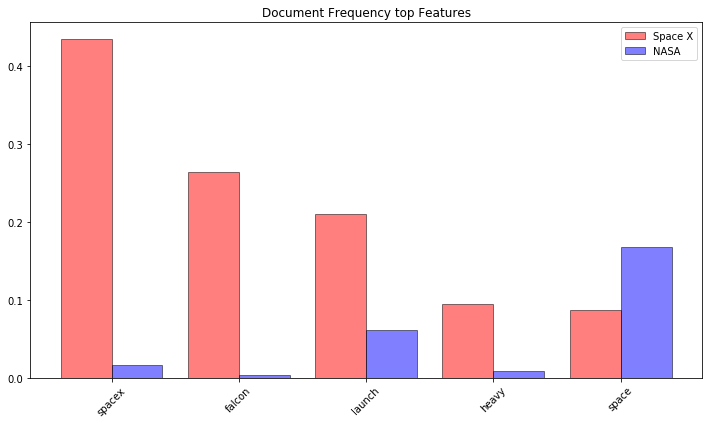

In [48]:
plt.figure(figsize=(10,6))
locs, labels = plt.xticks(fontsize=10)
plt.setp(labels, rotation=45)
plt.title('Document Frequency top Features')
plt.bar(df_1.index, df_1[['spacex']].T.values[0], alpha=0.5, align='edge', width=-.4, ec='k', color='red')
plt.bar(df_1.index, df_1[['nasa']].T.values[0], alpha=0.5, align='edge', width=.4, ec='k', color='blue')
plt.legend(['Space X', 'NASA'])
plt.tight_layout();

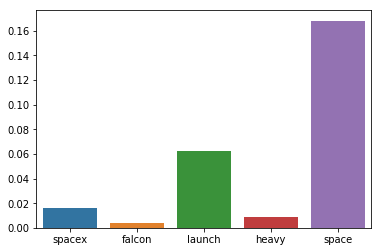

In [29]:
sns.barplot(data=df_1[['nasa']].T)

/Users/nelson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


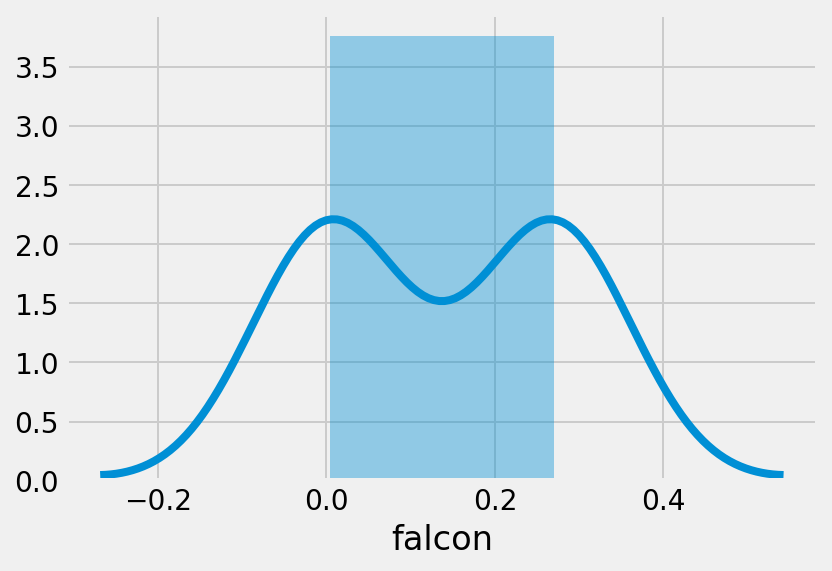

In [104]:
sns.distplot(df['falcon'])

In [ ]:
palette = ["#c9d9d3", "#718dbf", "#e84d60", '#6f4669', '#818d4a']
#x = ['spacex', 'falcon', 'launch', 'heavy']
x = term_df_spacex_mean.index
#counts = term_df_spacex_mean['1']
counts = term_df_spacex_mean.values

In [ ]:
# p = figure(plot_height=350, title="CountVectorizer for top words",
#            toolbar_location=None, tools="")
# p.vbar(x='x', top='counts', width=0.9, line_color="white",
#        fill_color=factor_cmap('x', palette=palette, factors=['spacex','falcon','launch','heavy','space']))

p.vbar(x='x', top='counts', width=0.9, line_color="white")

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [ ]:
list(x)

In [ ]:
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

output_file("bar_dodged.html")

words = list(term_df_spacex_mean.index)
#years = ['2015', '2016', '2017']

data = spacex_mean_trans

# data = {'fruits' : fruits,
#         '2015'   : [2, 1, 4, 3, 2, 4],
#         '2016'   : [5, 3, 3, 2, 4, 6],
#         '2017'   : [3, 2, 4, 4, 5, 3]}

source = ColumnDataSource(data=data)

p = figure(plot_height=350)
# p = figure(x_range=fruits, y_range=(0, 10), plot_height=350, title="Fruit Counts by Year",
#            toolbar_location=None, tools="")

p.vbar(x=dodge('fruits', -0.25, range=p.x_range), top='2015', width=0.2, source=source,
       color="#c9d9d3", legend=value("2015"))

p.vbar(x=dodge('fruits',  0.0,  range=p.x_range), top='2016', width=0.2, source=source,
       color="#718dbf", legend=value("2016"))

p.vbar(x=dodge('fruits',  0.25, range=p.x_range), top='2017', width=0.2, source=source,
       color="#e84d60", legend=value("2017"))

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [ ]:
term_df.groupby('target').mean().T.sort_values(1 , ascending=False)

### TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer

In [ ]:
.005*2000

In [ ]:
## Pass in the following hyperparameters:
### ngram_range = (1,2)
### min_df = (need to set a minimum document limit)

tvec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.01)

In [ ]:
df_new['sub'] = [1 if i == 'spacex' else 0 for i in df_new['subreddit']]

In [ ]:
X = tvec.fit_transform(df_new['title'])

In [ ]:
y = df_new['sub'].values

In [ ]:
df_final = pd.DataFrame(X.toarray(), columns=tvec.get_feature_names())

In [ ]:
df_final['target'] = y

In [ ]:
df_final['target'].value_counts()

In [ ]:
df_final.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df_mean_spacex = df_final.groupby('target').mean().T.sort_values(1 , ascending=False)

In [ ]:
df_mean_spacex

In [ ]:
df_mean_nasa = df_final.groupby('target').mean().T.sort_values(0 , ascending=False).head(20)

In [ ]:
df_mean_nasa.head()

### Log Reg

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
log_reg = LogisticRegression()

In [ ]:
X_new = df_final.drop('target', axis=1)
y_new = df_final['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new)

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
log_reg.score(X_train, y_train)

In [ ]:
log_reg.score(X_test, y_test)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_3.fit(X_train, y_train)

In [ ]:
print('KNN3_train_score: '+str(knn_3.score(X_train, y_train)))
print('KNN3_test_score: '+str(knn_3.score(X_test, y_test)))

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

In [ ]:
print('KNN5_train_score: '+str(knn_5.score(X_train, y_train)))
print('KNN5_test_score: '+str(knn_5.score(X_test, y_test)))

## Predicting subreddit using Random Forests + Another Classifier

In [ ]:
## YOUR CODE HERE

#### We want to predict a binary variable - class `0` for one of your subreddits and `1` for the other.

In [ ]:
## YOUR CODE HERE

#### Thought experiment: What is the baseline accuracy for this model?

In [ ]:
## YOUR CODE HERE

#### Create a `RandomForestClassifier` model to predict which subreddit a given post belongs to.

In [ ]:
## YOUR CODE HERE

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 
- **Bonus**: Use `GridSearchCV` with `Pipeline` to optimize your `CountVectorizer`/`TfidfVectorizer` and classification model.

In [ ]:
## YOUR CODE HERE

#### Repeat the model-building process using a different classifier (e.g. `MultinomialNB`, `LogisticRegression`, etc)

In [ ]:
## YOUR CODE HERE

# Executive Summary
---
Put your executive summary in a Markdown cell below.